<a href="https://colab.research.google.com/github/paolalarap/challenge-practicando-python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [287]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##Ingreso Total
###Se calcular el ingreso total por tienda

In [288]:
ingreso_total_tienda=tienda['Precio'].sum()
ingreso_total_tienda2=tienda2['Precio'].sum()
ingreso_total_tienda3=tienda3['Precio'].sum()
ingreso_total_tienda4=tienda4['Precio'].sum()


In [289]:
print(f'Los ingresos totales por tiendas son: \
        Tienda 1={ingreso_total_tienda} \
        Tienda 2={ingreso_total_tienda2} \
        Tienda 3 ={ingreso_total_tienda3}\
        Tienda 4 ={ingreso_total_tienda4}')


Los ingresos totales por tiendas son:         Tienda 1=1150880400.0         Tienda 2=1116343500.0         Tienda 3 =1098019600.0        Tienda 4 =1038375700.0


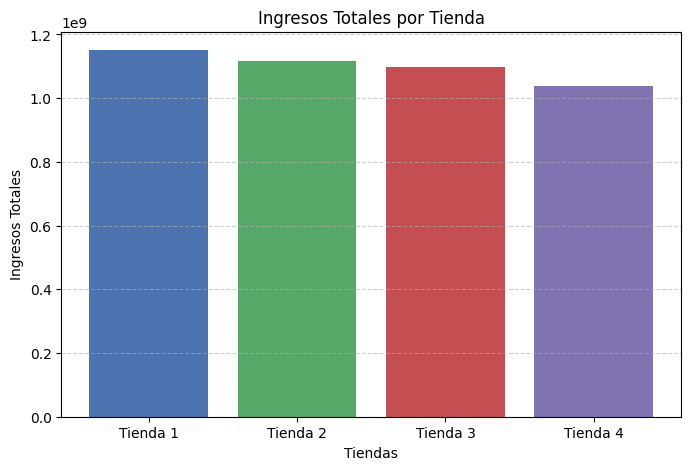

In [346]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [
    ingreso_total_tienda,
    ingreso_total_tienda2,
    ingreso_total_tienda3,
    ingreso_total_tienda4
]

# Crear gráfico
plt.figure(figsize=(8,5))
plt.bar(tiendas, ingresos, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos Totales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# 2. Ventas por categoría

##a) Tienda
###Se categoriza según los productos vendidos y se ordenan por productos más populares

In [290]:
print(tienda[['Categoría del Producto','Fecha de Compra']])

     Categoría del Producto Fecha de Compra
0              Electrónicos      16/01/2021
1                   Muebles      18/05/2022
2                  Juguetes      15/03/2021
3         Electrodomésticos      03/05/2022
4                   Muebles      07/11/2020
...                     ...             ...
2354           Electrónicos      15/11/2021
2355           Electrónicos      18/03/2023
2356               Juguetes      06/07/2021
2357                Muebles      02/05/2022
2358           Electrónicos      18/06/2022

[2359 rows x 2 columns]


In [291]:
df=pd.DataFrame(tienda)


In [292]:
categoria_tienda=df.groupby(['Categoría del Producto', 'Fecha de Compra']).size().reset_index(name='Total Vendidos')
print(categoria_tienda)

       Categoría del Producto Fecha de Compra  Total Vendidos
0     Artículos para el hogar      01/02/2021               1
1     Artículos para el hogar      01/04/2020               1
2     Artículos para el hogar      01/04/2021               1
3     Artículos para el hogar      01/04/2022               1
4     Artículos para el hogar      01/11/2022               1
...                       ...             ...             ...
2073                  Muebles      31/01/2021               1
2074                  Muebles      31/03/2023               2
2075                  Muebles      31/07/2020               2
2076                  Muebles      31/07/2021               2
2077                  Muebles      31/08/2022               2

[2078 rows x 3 columns]


In [293]:
print(tienda['Categoría del Producto'].unique())

['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']


In [294]:
productos=categoria_tienda.groupby('Categoría del Producto')['Total Vendidos'].sum().reset_index(name='Total')
print(productos)

    Categoría del Producto  Total
0  Artículos para el hogar    171
1     Deportes y diversión    284
2        Electrodomésticos    312
3             Electrónicos    448
4   Instrumentos musicales    182
5                 Juguetes    324
6                   Libros    173
7                  Muebles    465


In [295]:
productos_ordenados=productos.sort_values(by='Total', ascending=False)
print(productos_ordenados)


    Categoría del Producto  Total
7                  Muebles    465
3             Electrónicos    448
5                 Juguetes    324
2        Electrodomésticos    312
1     Deportes y diversión    284
4   Instrumentos musicales    182
6                   Libros    173
0  Artículos para el hogar    171


##b) Tienda 2
## Se categoriza según los productos vendidos y se ordenan por productos más populares

In [296]:
print(tienda2[['Categoría del Producto','Fecha de Compra']])

       Categoría del Producto Fecha de Compra
0                     Muebles      04/08/2021
1      Instrumentos musicales      26/11/2020
2                     Muebles      22/10/2021
3                     Muebles      04/05/2022
4                     Muebles      26/02/2022
...                       ...             ...
2354  Artículos para el hogar      04/12/2022
2355        Electrodomésticos      09/02/2020
2356        Electrodomésticos      27/09/2022
2357             Electrónicos      21/04/2022
2358     Deportes y diversión      03/09/2022

[2359 rows x 2 columns]


In [297]:
df2=pd.DataFrame(tienda2)

In [298]:
categoria_tienda2=df2.groupby(['Categoría del Producto', 'Fecha de Compra']).size().reset_index(name='Total Vendidos')
print(categoria_tienda2)

       Categoría del Producto Fecha de Compra  Total Vendidos
0     Artículos para el hogar      01/01/2020               1
1     Artículos para el hogar      01/03/2020               1
2     Artículos para el hogar      01/08/2021               1
3     Artículos para el hogar      02/02/2021               1
4     Artículos para el hogar      02/02/2023               2
...                       ...             ...             ...
2055                  Muebles      31/01/2020               2
2056                  Muebles      31/01/2021               1
2057                  Muebles      31/05/2022               1
2058                  Muebles      31/07/2020               2
2059                  Muebles      31/10/2022               1

[2060 rows x 3 columns]


In [299]:
print(tienda2['Categoría del Producto'].unique())

['Muebles' 'Instrumentos musicales' 'Deportes y diversión' 'Electrónicos'
 'Artículos para el hogar' 'Juguetes' 'Electrodomésticos' 'Libros']


In [300]:
productos2=categoria_tienda2.groupby('Categoría del Producto')['Total Vendidos'].sum().reset_index(name='Total')
print(productos2)

    Categoría del Producto  Total
0  Artículos para el hogar    181
1     Deportes y diversión    275
2        Electrodomésticos    305
3             Electrónicos    422
4   Instrumentos musicales    224
5                 Juguetes    313
6                   Libros    197
7                  Muebles    442


In [301]:
productos_ordenados2=productos2.sort_values(by='Total', ascending=False)
print(productos_ordenados2)

    Categoría del Producto  Total
7                  Muebles    442
3             Electrónicos    422
5                 Juguetes    313
2        Electrodomésticos    305
1     Deportes y diversión    275
4   Instrumentos musicales    224
6                   Libros    197
0  Artículos para el hogar    181


##c) Tienda 3
###Se categoriza según los productos vendidos y se ordenan por productos más populares

In [302]:
print(tienda3[['Categoría del Producto','Fecha de Compra']])

      Categoría del Producto Fecha de Compra
0          Electrodomésticos      17/12/2021
1                    Muebles      10/02/2021
2     Instrumentos musicales      22/01/2023
3       Deportes y diversión      22/03/2022
4                    Muebles      12/01/2022
...                      ...             ...
2354                  Libros      21/10/2022
2355                  Libros      23/06/2022
2356                 Muebles      19/02/2023
2357                 Muebles      19/09/2021
2358                  Libros      24/05/2022

[2359 rows x 2 columns]


In [303]:
df3=pd.DataFrame(tienda3)

In [304]:
categoria_tienda3=df3.groupby(['Categoría del Producto', 'Fecha de Compra']).size().reset_index(name='Total Vendidos')
print(categoria_tienda3)

       Categoría del Producto Fecha de Compra  Total Vendidos
0     Artículos para el hogar      01/01/2022               1
1     Artículos para el hogar      01/05/2021               1
2     Artículos para el hogar      01/08/2020               1
3     Artículos para el hogar      01/08/2021               1
4     Artículos para el hogar      01/08/2022               1
...                       ...             ...             ...
2041                  Muebles      31/03/2021               1
2042                  Muebles      31/03/2023               1
2043                  Muebles      31/05/2020               1
2044                  Muebles      31/08/2021               1
2045                  Muebles      31/12/2020               2

[2046 rows x 3 columns]


In [305]:
print(tienda3['Categoría del Producto'].unique())

['Electrodomésticos' 'Muebles' 'Instrumentos musicales'
 'Deportes y diversión' 'Electrónicos' 'Juguetes'
 'Artículos para el hogar' 'Libros']


In [306]:
productos3=categoria_tienda3.groupby('Categoría del Producto')['Total Vendidos'].sum().reset_index(name='Total')
print(productos3)

    Categoría del Producto  Total
0  Artículos para el hogar    177
1     Deportes y diversión    277
2        Electrodomésticos    278
3             Electrónicos    451
4   Instrumentos musicales    177
5                 Juguetes    315
6                   Libros    185
7                  Muebles    499


In [307]:
productos_ordenados3=productos3.sort_values(by='Total', ascending=False)
print(productos_ordenados3)

    Categoría del Producto  Total
7                  Muebles    499
3             Electrónicos    451
5                 Juguetes    315
2        Electrodomésticos    278
1     Deportes y diversión    277
6                   Libros    185
0  Artículos para el hogar    177
4   Instrumentos musicales    177


##d) Tienda 4
###Se categoriza según los productos vendidos y se ordenan por productos más populares

In [308]:
print(tienda4[['Categoría del Producto','Fecha de Compra']])

       Categoría del Producto Fecha de Compra
0           Electrodomésticos      11/11/2022
1                     Muebles      03/01/2020
2        Deportes y diversión      25/12/2022
3                      Libros      23/11/2021
4                Electrónicos      25/04/2022
...                       ...             ...
2353                  Muebles      12/02/2020
2354                  Muebles      17/05/2022
2355     Deportes y diversión      03/05/2022
2356  Artículos para el hogar      15/06/2020
2357     Deportes y diversión      17/11/2021

[2358 rows x 2 columns]


In [309]:
df4=pd.DataFrame(tienda4)

In [310]:
categoria_tienda4=df4.groupby(['Categoría del Producto', 'Fecha de Compra']).size().reset_index(name='Total Vendidos')
print(categoria_tienda4)

       Categoría del Producto Fecha de Compra  Total Vendidos
0     Artículos para el hogar      01/05/2020               1
1     Artículos para el hogar      01/06/2020               1
2     Artículos para el hogar      02/01/2020               1
3     Artículos para el hogar      02/01/2021               2
4     Artículos para el hogar      02/02/2020               1
...                       ...             ...             ...
2055                  Muebles      31/08/2021               1
2056                  Muebles      31/10/2021               1
2057                  Muebles      31/12/2020               1
2058                  Muebles      31/12/2021               2
2059                  Muebles      31/12/2022               1

[2060 rows x 3 columns]


In [311]:
print(tienda4['Categoría del Producto'].unique())

['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes'
 'Artículos para el hogar']


In [312]:
productos4=categoria_tienda4.groupby('Categoría del Producto')['Total Vendidos'].sum().reset_index(name='Total')
print(productos3)

    Categoría del Producto  Total
0  Artículos para el hogar    177
1     Deportes y diversión    277
2        Electrodomésticos    278
3             Electrónicos    451
4   Instrumentos musicales    177
5                 Juguetes    315
6                   Libros    185
7                  Muebles    499


In [313]:
productos_ordenados4=productos4.sort_values(by='Total', ascending=False)
print(productos_ordenados4)

    Categoría del Producto  Total
7                  Muebles    480
3             Electrónicos    451
5                 Juguetes    338
1     Deportes y diversión    277
2        Electrodomésticos    254
0  Artículos para el hogar    201
6                   Libros    187
4   Instrumentos musicales    170


# 3. Calificación promedio de la tienda


##a) Tienda
##Calificación promedio de los cliente, para conocer la satisfacción de los productos vendidos

In [314]:
clasificacion1=df.groupby('Categoría del Producto')['Calificación'].mean().reset_index(name='Calificación Promedio').sort_values(by='Calificación Promedio', ascending=False)

print(clasificacion1)


    Categoría del Producto  Calificación Promedio
5                 Juguetes               4.077160
4   Instrumentos musicales               4.049451
2        Electrodomésticos               4.032051
3             Electrónicos               4.004464
6                   Libros               3.976879
7                  Muebles               3.946237
1     Deportes y diversión               3.897887
0  Artículos para el hogar               3.748538


##b) Tienda 2
###Calificación promedio de los cliente, para conocer la satisfacción de los productos vendidos

In [315]:
clasificacion2=df2.groupby('Categoría del Producto')['Calificación'].mean().reset_index(name='Calificación Promedio').sort_values(by='Calificación Promedio', ascending=False)

print(clasificacion2)

    Categoría del Producto  Calificación Promedio
7                  Muebles               4.092760
2        Electrodomésticos               4.072131
0  Artículos para el hogar               4.071823
1     Deportes y diversión               4.065455
4   Instrumentos musicales               4.035714
5                 Juguetes               4.025559
3             Electrónicos               3.971564
6                   Libros               3.949239


##c) Tienda 3
###Calificación promedio de los cliente, para conocer la satisfacción de los productos vendidos

In [316]:
clasificacion3=df3.groupby('Categoría del Producto')['Calificación'].mean().reset_index(name='Calificación Promedio').sort_values(by='Calificación Promedio', ascending=False)

print(clasificacion3)

    Categoría del Producto  Calificación Promedio
5                 Juguetes               4.196825
7                  Muebles               4.098196
0  Artículos para el hogar               4.073446
6                   Libros               4.048649
2        Electrodomésticos               4.010791
4   Instrumentos musicales               4.005650
3             Electrónicos               3.986696
1     Deportes y diversión               3.938628


##d) Tienda 4
###Calificación promedio de los cliente, para conocer la satisfacción de los productos vendidos

In [317]:
clasificacion4=df4.groupby('Categoría del Producto')['Calificación'].mean().reset_index(name='Calificación Promedio').sort_values(by='Calificación Promedio', ascending=False)

print(clasificacion4)

    Categoría del Producto  Calificación Promedio
1     Deportes y diversión               4.054152
6                   Libros               4.042781
0  Artículos para el hogar               4.009950
3             Electrónicos               4.006652
7                  Muebles               3.997917
5                 Juguetes               3.988166
2        Electrodomésticos               3.929134
4   Instrumentos musicales               3.911765


# 4. Productos más y menos vendidos

##a) Tienda
###Productos más y menos vendidos de la tienda 1

In [328]:
producto_mas_vendido=productos_ordenados.max().reset_index()
producto_menos_vendido=productos_ordenados.min().reset_index()
print("Producto más vendido de la tienda 1:")
print(producto_mas_vendido)
print("\nProducto menos vendido de la tienda 1:")
print(producto_menos_vendido)



Producto más vendido de la tienda 1:
                    index        0
0  Categoría del Producto  Muebles
1                   Total      465

Producto menos vendido de la tienda 1:
                    index                        0
0  Categoría del Producto  Artículos para el hogar
1                   Total                      171


##b) Tienda 2
###Productos más y menos vendidos de la tienda 2

In [329]:
producto_mas_vendido2=productos_ordenados2.max().reset_index()
producto_menos_vendido2=productos_ordenados2.min().reset_index()
print("Producto más vendido de la tienda 2:")
print(producto_mas_vendido2)
print("\nProducto menos vendido de la tienda 2:")
print(producto_menos_vendido2)

Producto más vendido de la tienda 2:
                    index        0
0  Categoría del Producto  Muebles
1                   Total      442

Producto menos vendido de la tienda 2:
                    index                        0
0  Categoría del Producto  Artículos para el hogar
1                   Total                      181


##c) Tienda 3
###Productos más y menos vendidos de la tienda 3

In [320]:
producto_mas_vendido3=productos_ordenados3.max().reset_index()
producto_menos_vendido3=productos_ordenados3.min().reset_index()
print("Producto más vendido de la tienda 3:")
print(producto_mas_vendido3)
print("\nProducto menos vendido de la tienda 3:")
print(producto_menos_vendido3)

Producto con mayor volumen de ventas:
                    index        0
0  Categoría del Producto  Muebles
1                   Total      499

Producto con menor volumen de ventas:
                    index                        0
0  Categoría del Producto  Artículos para el hogar
1                   Total                      177


##d) Tienda 4
###Productos más y menos vendidos de la tienda 4

In [330]:
producto_mas_vendido4=productos_ordenados4.max().reset_index()
producto_menos_vendido4=productos_ordenados4.min().reset_index()
print("Producto más vendido de la tienda 4:")
print(producto_mas_vendido4)
print("\nProducto menos vendido de la tienda 4:")
print(producto_menos_vendido4)

Producto más vendido de la tienda 4:
                    index        0
0  Categoría del Producto  Muebles
1                   Total      480

Producto menos vendido de la tienda 4:
                    index                        0
0  Categoría del Producto  Artículos para el hogar
1                   Total                      170


# 5. Envío promedio por tienda

##a) Tiendas
### Costo promedio envío de todas las tiendas

In [345]:
costo_de_envio_promedio=df['Costo de envío'].mean()
costo_de_envio_promedio2=df2['Costo de envío'].mean()
costo_de_envio_promedio3=df3['Costo de envío'].mean()
costo_de_envio_promedio4=df4['Costo de envío'].mean()
print(f'        El costo de envío promedio de la tienda 1 es {round(costo_de_envio_promedio)}\n\
        El costo de envío promedio de la tienda 2 es {round(costo_de_envio_promedio2)}\n\
        El costo de envío promedio de la tienda 3 es {round(costo_de_envio_promedio3)}\n\
        El costo de envío promedio de la tienda 4 es {round(costo_de_envio_promedio4)}')


        El costo de envío promedio de la tienda 1 es 26019
        El costo de envío promedio de la tienda 2 es 25216
        El costo de envío promedio de la tienda 3 es 24806
        El costo de envío promedio de la tienda 4 es 23459


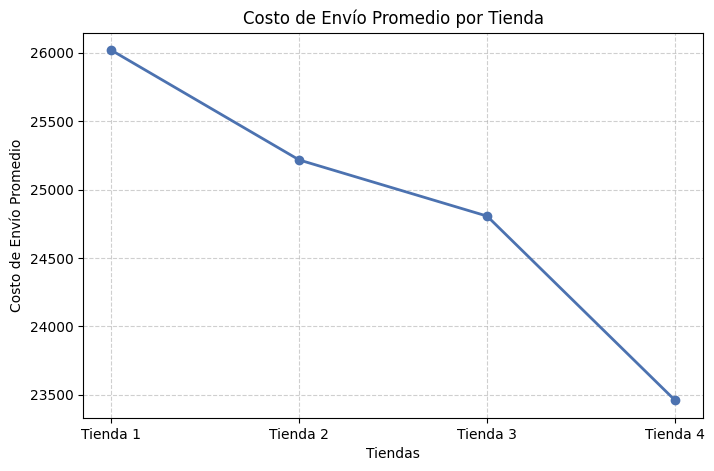

In [347]:
tiendas_costo_de_envio = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_promedio = [
    costo_de_envio_promedio,
    costo_de_envio_promedio2,
    costo_de_envio_promedio3,
    costo_de_envio_promedio4
]

# Crear gráfico de líneas
plt.figure(figsize=(8,5))
plt.plot(tiendas, costos_promedio, marker='o', linewidth=2, color='#4C72B0')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.grid(linestyle='--', alpha=0.6)
plt.show()
